In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Retrieve Country Population From Wikipedia

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
df_list = pd.read_html(
            url, # Specify the page 
            match='Population', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list) # check how many tables match

2

In [3]:
df_population = df_list[0]
df_population

,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [4]:
# Remove the footnote notations in square brackets
df_population = df_population.replace(
    to_replace = r'(.*)\[.\]',
    value = r'\1',
    regex=True
)


In [5]:
# Keep only the columns we need
df_population.columns = ['Country', 'Region', 'Subegion', 'Population_2018', 'Population_2019', 'Change']
df_population = df_population[ ['Country', 'Population_2019'] ]

In [6]:
df_population.dtypes

Country            object
Population_2019     int64
dtype: object

# Retrieve Life Expectancy From Wikipedia

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
df_list = pd.read_html(
            url, # Specify the page 
            match='Life expectancy at birth', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list)

5

In [8]:
df_who=df_list[0]
df_who

,Country,Life expectancy at birth,Life expectancy at birth.1,Life expectancy at birth.2,Life expectancy at birth.3,Life expectancy at birth.4,Life expectancy at age 60,Life expectancy at age 60.1,Life expectancy at age 60.2,Life expectancy at age 60.3,Life expectancy at age 60.4,HALE at birth,HALE at birth.1,HALE at birth.2,HALE at birth.3,HALE at age 60,HALE at age 60.1,HALE at age 60.2,HALE at age 60.3
0,Country,All,M,F,Δ from 2000,Gender life gap,All,M,F,Δ from 2000,Gender life gap,All,M,F,Gender life gap,All,M,F,Gender life gap
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Japan,84.3,81.5,86.9,3.2,5.4,26.3,23.9,28.6,2.2,4.7,74.1,72.6,75.5,2.9,20.4,18.8,21.8,3.0
3,Switzerland,83.4,81.8,85.1,3.7,3.3,25.4,24.1,26.6,2.4,2.5,72.5,72.2,72.8,0.6,19.5,18.8,20.2,1.4
4,South Korea,83.3,80.3,86.1,7.1,5.8,25.8,23.4,27.9,5.1,4.5,73.1,71.3,74.7,3.4,19.8,18.2,21.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Mozambique,58.1,54.5,61.7,7.4,7.2,15.8,13.3,17.8,0.6,4.5,50.4,47.9,52.8,4.9,11.6,9.8,13.0,3.2
188,Eswatini,57.7,53.4,63.2,10.7,9.8,15.1,12.4,17.7,1.5,5.3,50.1,47.1,53.8,6.7,11.0,9.0,12.9,3.9
189,Somalia,56.5,54.0,59.2,6.6,5.2,14.5,13.2,16.0,1.4,2.8,49.7,48.3,51.3,3.0,11.2,10.3,12.2,1.9
190,Central African Republic,53.1,50.2,56.3,8.8,6.1,13.2,11.3,14.9,1.4,3.6,46.4,44.5,48.4,3.9,10.0,8.6,11.1,2.5


In [9]:
df_who = df_who[ ['Country', 'Life expectancy at birth'] ]
df_who = df_who.drop([0,1])

In [10]:
df_who['Life_expectancy'] = pd.to_numeric(df_who['Life expectancy at birth'])
df_who = df_who.drop('Life expectancy at birth', axis='columns')

In [11]:
df_who

,Country,Life_expectancy
2,Japan,84.3
3,Switzerland,83.4
4,South Korea,83.3
5,Singapore,83.2
6,Spain,83.2
...,...,...
187,Mozambique,58.1
188,Eswatini,57.7
189,Somalia,56.5
190,Central African Republic,53.1


# Joining Tables on Country and Plotting

In [12]:
join = pd.merge(df_population, df_who, how = 'inner', left_on= 'Country', right_on = 'Country' )
join

,Country,Population_2019,Life_expectancy
0,China,1433783686,77.4
1,India,1366417754,70.8
2,United States,329064917,78.5
3,Indonesia,270625568,71.3
4,Pakistan,216565318,65.6
...,...,...,...
178,Tonga,110940,72.6
179,Saint Vincent and the Grenadines,110589,73.2
180,Seychelles,97739,73.3
181,Antigua and Barbuda,97118,76.5


In [13]:
join.dtypes

Country             object
Population_2019      int64
Life_expectancy    float64
dtype: object

<AxesSubplot:xlabel='Population_2019', ylabel='Life_expectancy'>

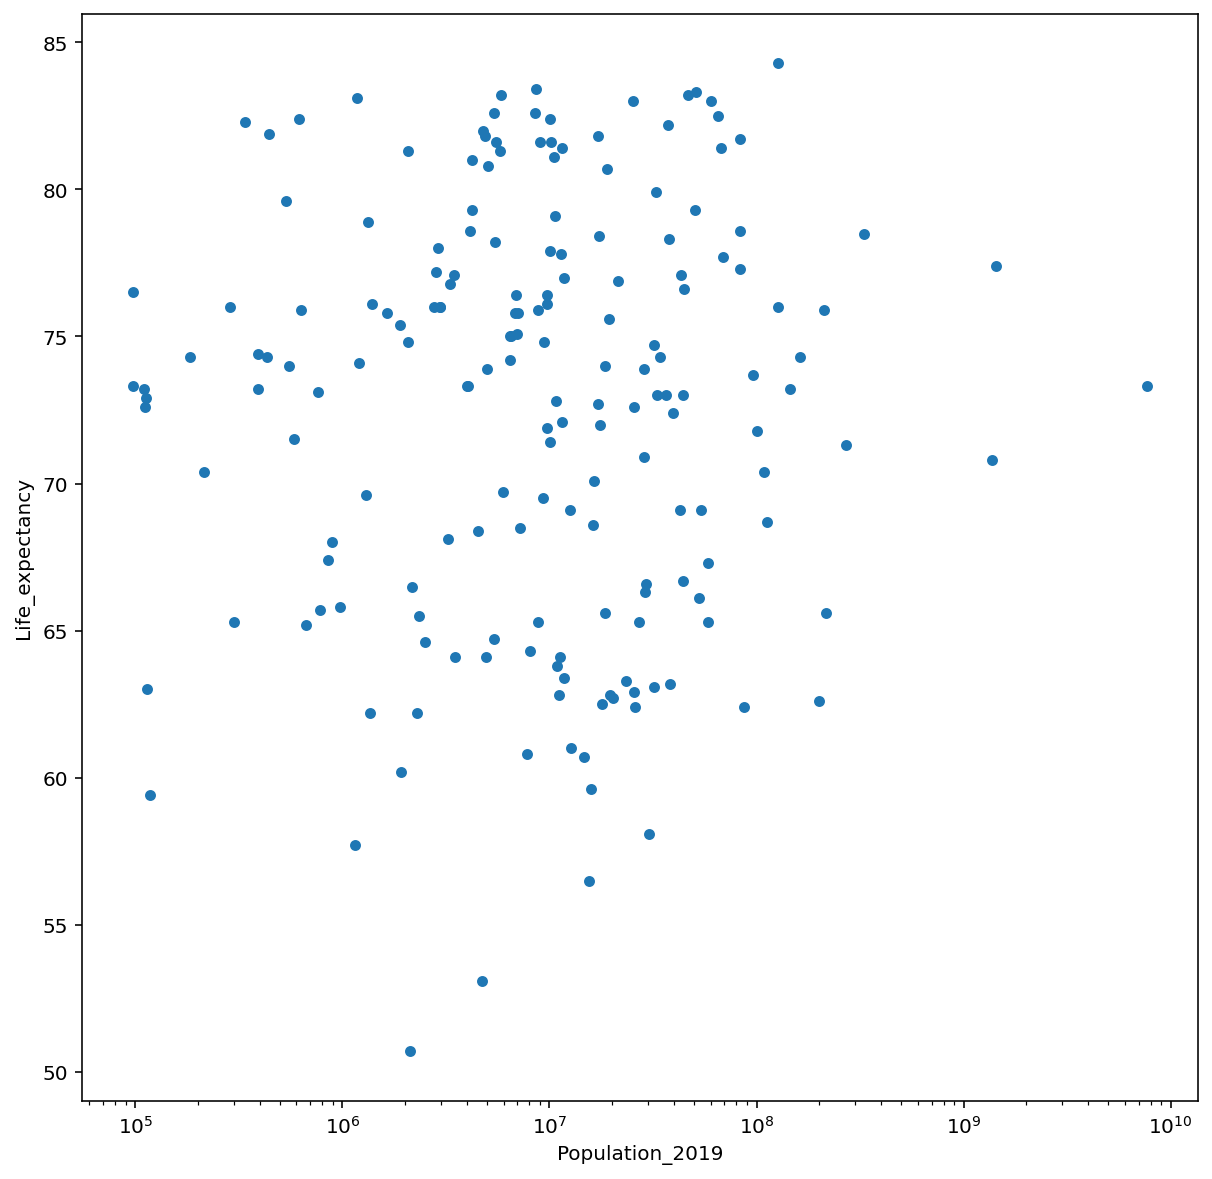

In [14]:
join.plot.scatter(x='Population_2019', y = 'Life_expectancy', logx=True, figsize=(10,10))